# Coursework 

**Initialize packages**

In [272]:
using JuMP, HiGHS, Plots, DataFrames, CSV, Statistics

**Reading Data**

In [273]:
flex_avail = DataFrame(CSV.File("input_files/Flexible_load_availability.csv"))

8736×7 DataFrame
  Row │ Column1  ev_load_shifting_z1  ev_load_shifting_z2  ev_load_shifting_z3 ⋯
      │ Int64?   Float64              Float64              Float64             ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │       1              2871.96              4072.45              1771.98 ⋯
    2 │       2              2317.07              3146.42              1550.97
    3 │       3              2152.1               2609.74              1479.94
    4 │       4              2092.11              2388.75              1448.36
    5 │       5              2039.62              2220.38              1428.63 ⋯
    6 │       6              2144.6               2199.33              1590.44
    7 │       7              3074.42              3367.4               1914.05
    8 │       8              3434.36              4219.78              2099.54
    9 │       9              3936.76              4998.49              2387.63 ⋯
   10 │      10              4919.08              6240.22              2790.17
   11 │      11              5286.51              7429.33              2987.5
  ⋮   │    ⋮              ⋮                    ⋮                    ⋮          ⋱
 8727 │ missing              4731.61              7176.78              2431.04
 8728 │ missing              4814.1               7282.01              2506.02 ⋯
 8729 │ missing              4919.08              7502.99              2438.93
 8730 │ missing              4656.63              6640.1               2450.77
 8731 │ missing              5181.53              6818.99              2648.1
 8732 │ missing              5331.5               6997.88              2703.35 ⋯
 8733 │ missing              5226.52              6734.8               2648.1
 8734 │ missing              5279.01              6513.82              2569.17
 8735 │ missing              4424.17              5892.95              2186.36
 8736 │ missing              3546.84              4777.5               1787.76 ⋯
                                                 3 columns and 8715 rows omitted

In [274]:
flex_load = DataFrame(CSV.File("input_files/Flexible_load_data.csv"))

6×6 DataFrame
 Row │ ID     Zone_name  Zone   Load_type         Max_Capacity_MW  Max_Delay_H ⋯
     │ Int64  String15   Int64  String31          Float64          Int64       ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │     1  CA_N           1  ev_load_shifting          559.626              ⋯
   2 │     2  CA_S           2  ev_load_shifting          785.349
   3 │     3  WECC_N         3  ev_load_shifting          447.022
   4 │     4  WECC_NMAZ      4  ev_load_shifting          903.914
   5 │     5  WECC_PNW       5  ev_load_shifting          688.733              ⋯
   6 │     6  WECC_WYCO      6  ev_load_shifting          415.601
                                                                1 column omitted

In [275]:
#fuels = DataFrame(CSV.File("input_files/Fuels_data.csv"));


In [276]:
generators = DataFrame(CSV.File("input_files/Generators_data.csv"))


13×41 DataFrame
 Row │ R_ID   Zone_name  Zone   Resource           Cluster     New_Build  Num_ ⋯
     │ Int64  String15   Int64  String31           String15    Int64      Int6 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │    48  CA_N           1  new_onshore_wind   CA_N_0              1       ⋯
   2 │    65  CA_S           2  new_utility_pv     CA_S_0              1
   3 │    79  WECC_N         3  new_onshore_wind   WECC_N_0            1
   4 │   117  WECC_NMAZ      4  nuclear            1                   1
   5 │   120  WECC_PNW       5  new_onshore_wind   WECC_PNW_0          1       ⋯
   6 │   143  WECC_WYCO      6  naturalgas_ccs100  0                   1
   7 │   156  CA_N           1  new_biogas_CCGT    0                   1
   8 │   157  CA_S           2  new_biogas_CCGT    0                   1
   9 │   158  WECC_N         3  new_biogas_CCGT    0                   1       ⋯
  10 │   159  WECC_NMAZ      4  new_biogas_CCGT    0                   1
  11 │   160  WECC_PNW       5  new_biogas_CCGT    0                   1
  12 │   161  WECC_WYCO      6  new_biogas_CCGT    0                   1
  13 │    58  CA_N           1  battery            1                   1       ⋯
                                                              35 columns omitted

In [277]:
gen_var = DataFrame(CSV.File("input_files/Generators_variability.csv"))
#gen_var=gen_var[:,2:39]
gen_var=gen_var[:,2:end]

8736×13 DataFrame
  Row │ new_onshore_wind  new_utility_pv  new_onshore_wind_1  nuclear  new_ons ⋯
      │ Int64             Float64         Float64             Int64    Float64 ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │                1          0.0                 0.6609        1          ⋯
    2 │                1          0.0                 0.6048        1
    3 │                1          0.0                 0.6184        1
    4 │                1          0.0                 0.4097        1
    5 │                1          0.0                 0.2867        1          ⋯
    6 │                1          0.0                 0.1609        1
    7 │                1          0.3553              0.0653        1
    8 │                1          0.6335              0.0083        1
    9 │                1          0.805               0.0003        1          ⋯
   10 │                1          0.8659              0.0027        1
   11 │                1          0.8884              0.0055        1
  ⋮   │        ⋮                ⋮                 ⋮              ⋮             ⋱
 8727 │                1          0.9413              0.0061        1
 8728 │                1          0.9257              0.1905        1          ⋯
 8729 │                1          0.8105              0.465         1
 8730 │                1          0.5661              0.1887        1
 8731 │                1          0.1734              0.4314        1
 8732 │                1          0.0                 0.7756        1          ⋯
 8733 │                1          0.0                 0.731         1
 8734 │                1          0.0                 0.6283        1
 8735 │                1          0.0                 0.5065        1
 8736 │                1          0.0                 0.3377        1          ⋯
                                                 9 columns and 8715 rows omitted

In [278]:
load = DataFrame(CSV.File("input_files/Load_data.csv"))
load=load[:,9:15]

8736×7 DataFrame
  Row │ Time_index  Load_MW_z1  Load_MW_z2  Load_MW_z3  Load_MW_z4  Load_MW_z5 ⋯
      │ Int64       Int64       Int64       Int64       Int64       Int64      ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │          1       18637       26154       11681       19738       23146 ⋯
    2 │          2       17258       24219       10898       18223       21419
    3 │          3       16676       23403       10379       17296       20953
    4 │          4       16195       22689       10277       17012       20782
    5 │          5       15061       20989       10243       16657       20707 ⋯
    6 │          6       13442       19115       10339       15738       21307
    7 │          7       11911       17385       10519       14883       22367
    8 │          8       11176       16638       10923       15330       24377
    9 │          9       11889       17477       11736       16766       26964 ⋯
   10 │         10       13537       20189       12683       18680       29411
   11 │         11       15402       23206       13583       20759       31318
  ⋮   │     ⋮           ⋮           ⋮           ⋮           ⋮           ⋮      ⋱
 8727 │       8727       23639       33946       14053       23554       32386
 8728 │       8728       26170       37395       14206       25325       32782 ⋯
 8729 │       8729       28105       39566       14529       26522       33813
 8730 │       8730       27759       38956       14764       26491       33680
 8731 │       8731       28274       39678       14708       26136       34668
 8732 │       8732       28139       39489       15132       26301       34817 ⋯
 8733 │       8733       27250       38241       15005       25016       33209
 8734 │       8734       25334       35552       14020       22819       30502
 8735 │       8735       22808       32008       12764       21024       27404
 8736 │       8736       20122       28238       11623       19088       24522 ⋯
                                                  1 column and 8715 rows omitted

In [279]:
network = DataFrame(CSV.File("input_files/Network.csv"))

10×13 DataFrame
 Row │ Transmission Path Name  Network_lines  z1     z2     z3     z4     z5   ⋯
     │ String31                Int64          Int64  Int64  Int64  Int64  Int6 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ CA_N_to_CA_S                        1      1     -1      0      0       ⋯
   2 │ CA_N_to_WECC_N                      2      1      0     -1      0
   3 │ CA_S_to_WECC_N                      3      0      1     -1      0
   4 │ CA_S_to_WECC_NMAZ                   4      0      1      0     -1
   5 │ WECC_N_to_WECC_NMAZ                 5      0      0      1     -1       ⋯
   6 │ WECC_N_to_WECC_WYCO                 6      0      0      1      0
   7 │ WECC_NMAZ_to_WECC_WYCO              7      0      0      0      1
   8 │ CA_N_to_WECC_PNW                    8      1      0      0      0     -
   9 │ CA_S_to_WECC_PNW                    9      0      1      0      0     - ⋯
  10 │ WECC_N_to_WECC_PNW                 10      0      0      1      0     -
                                                               7 columns omitted

In [280]:
# Extract row indices based on New_Build values
indices_new_build_1 = findall(generators.New_Build .== 1).+1
#indices_new_build_minus1 = findall(generators.New_Build .== -1).+1;
#ndices_new_build_0 = findall(generators.New_Build .== 0).+1;

13-element Vector{Int64}:
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
 13
 14

### Problem formulation
The objective function will be:
$\begin{align}
\min &\sum_{g \in Gen} FixedCost_g \times CAP_g + \sum_{g\in Gen}\sum_{h \in H} VarCost_g \times GEN_{g,h} +\\[6pt]
&\quad\quad \sum_{h \in H} NSECost \times NSE_h &\\
\end{align}$

s.t. the constraints
$\begin{align}
&\text{Supply demand balance constraint:}&\\[6pt]
&\sum_{g \in NEW} CAP_{g,h,j} + \sum_{s \in STOR} (DISCHARGE_{s,h,j} -CHARGE_{s,h,j} ) + &\\
& NSE_{h,j} - Demand_{h,j} + FShift_{h,j} -PShift_{h,j} = \sum_{j \in J_i} FLOW_{ij} & \forall \quad i \in \mathcal{N}\\
\end{align}$


$\begin{align}
&\text{Thermal limit constraint:}&\\[6pt]
& FLOW_{ij} \leq MaxFlow_{ij} & \forall \quad i \in \mathcal{N}, \forall j \in J_i \\
&\text{Flow direction constraint:}&\\[6pt]
& FLOW_{ij} = - FLOW_{ji} & \forall \quad i, j \in \mathcal{N} \\
\end{align}
$

$\begin{align}
&\text{Capacity constraint for new generators:}&\\[6pt]
& 0 \leq  GEN_{g,h} \leq CAP_g \times CF_{g,h} & \forall \quad g \in NEW, h \in H\\[6pt]
&\text{Capacity constraint for nuclear:}&\\[6pt]
& GEN_{Nuclear,h} = CAP_{Nuclear} & \forall h \in H\\[6pt]
&\text{Capacity variable only for new build:}&\\[6pt]
& CAP_{g} \geq 0 & \forall \quad g \in NEW\\[6pt]
&\text{NSE constraint:}&\\[6pt]
& NSE_{h} \geq 0 & \forall \quad h \in H
\end{align}$

$\begin{align}
&\text{Charging and discharging constraint for storage:}&\\[6pt]
& 0 \leq CHARGE_{s,h} \leq CAP_s  & \forall \quad s \in STOR,  h \in H\\[6pt]
& 0 \leq DISCHARGE_{s,h} \leq CAP_s  & \forall \quad s \in STOR,  h \in H\\[6pt]
& 0 \leq SOC_{s,h} \leq SOC_{s}^{max}& \forall \quad s \in S, h \in H\\[6pt]
& SOC_{s,1} = SOC_{s,t_{end}} = 50\% *SOC_{s}^{max}& \forall \quad s \in S\\[6pt]
&\text{Efficiency of storage constraint:}&\\[6pt]
& SOC_{s,h}=SOC_{s,h-1} + \big(CHARGE_{s,h} * Eff_s - \frac{DISCHARGE_{s,h}}{Eff_s}\big)  & \forall \quad s \in S, h \in H \setminus {1} \\[6pt]
\end{align}$


**SETS**

**CASE 1: NO FLEXIBILITY**

**Sets**

In [281]:
# The set of hours in the demand DataFrame
H = load.Time_index # same for every zone

8736-element Vector{Int64}:
    1
    2
    3
    4
    5
    6
    7
    8
    9
   10
   11
   12
   13
    ⋮
 8725
 8726
 8727
 8728
 8729
 8730
 8731
 8732
 8733
 8734
 8735
 8736

In [282]:
H_2 = H[2:end]

8735-element Vector{Int64}:
    2
    3
    4
    5
    6
    7
    8
    9
   10
   11
   12
   13
   14
    ⋮
 8725
 8726
 8727
 8728
 8729
 8730
 8731
 8732
 8733
 8734
 8735
 8736

In [283]:
# The set of generators from the generators DataFrame
generators_new = generators[generators.New_Build .== 1, :]

13×41 DataFrame
 Row │ R_ID   Zone_name  Zone   Resource           Cluster     New_Build  Num_ ⋯
     │ Int64  String15   Int64  String31           String15    Int64      Int6 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │    48  CA_N           1  new_onshore_wind   CA_N_0              1       ⋯
   2 │    65  CA_S           2  new_utility_pv     CA_S_0              1
   3 │    79  WECC_N         3  new_onshore_wind   WECC_N_0            1
   4 │   117  WECC_NMAZ      4  nuclear            1                   1
   5 │   120  WECC_PNW       5  new_onshore_wind   WECC_PNW_0          1       ⋯
   6 │   143  WECC_WYCO      6  naturalgas_ccs100  0                   1
   7 │   156  CA_N           1  new_biogas_CCGT    0                   1
   8 │   157  CA_S           2  new_biogas_CCGT    0                   1
   9 │   158  WECC_N         3  new_biogas_CCGT    0                   1       ⋯
  10 │   159  WECC_NMAZ      4  new_biogas_CCGT    0                   1
  11 │   160  WECC_PNW       5  new_biogas_CCGT    0                   1
  12 │   161  WECC_WYCO      6  new_biogas_CCGT    0                   1
  13 │    58  CA_N           1  battery            1                   1       ⋯
                                                              35 columns omitted

In [284]:
# Storage
storage = generators_new[generators_new.Resource .== "battery", :]

1×41 DataFrame
 Row │ R_ID   Zone_name  Zone   Resource  Cluster   New_Build  Num_Units  Cap_ ⋯
     │ Int64  String15   Int64  String31  String15  Int64      Int64      Int6 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │    58  CA_N           1  battery   1                 1          0       ⋯
                                                              34 columns omitted

In [285]:
gen = generators_new[generators_new.Resource .!= "battery", :]

12×41 DataFrame
 Row │ R_ID   Zone_name  Zone   Resource           Cluster     New_Build  Num_ ⋯
     │ Int64  String15   Int64  String31           String15    Int64      Int6 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │    48  CA_N           1  new_onshore_wind   CA_N_0              1       ⋯
   2 │    65  CA_S           2  new_utility_pv     CA_S_0              1
   3 │    79  WECC_N         3  new_onshore_wind   WECC_N_0            1
   4 │   117  WECC_NMAZ      4  nuclear            1                   1
   5 │   120  WECC_PNW       5  new_onshore_wind   WECC_PNW_0          1       ⋯
   6 │   143  WECC_WYCO      6  naturalgas_ccs100  0                   1
   7 │   156  CA_N           1  new_biogas_CCGT    0                   1
   8 │   157  CA_S           2  new_biogas_CCGT    0                   1
   9 │   158  WECC_N         3  new_biogas_CCGT    0                   1       ⋯
  10 │   159  WECC_NMAZ      4  new_biogas_CCGT    0                   1
  11 │   160  WECC_PNW       5  new_biogas_CCGT    0                   1
  12 │   161  WECC_WYCO      6  new_biogas_CCGT    0                   1
                                                              35 columns omitted

In [286]:
new_col_names = string.(generators_new.R_ID)  # Convert to String


13-element Vector{String}:
 "48"
 "65"
 "79"
 "117"
 "120"
 "143"
 "156"
 "157"
 "158"
 "159"
 "160"
 "161"
 "58"

In [287]:
rename!(gen_var, new_col_names);

In [288]:
var_new = gen_var[:,string.(gen.R_ID)];

In [289]:
Id_storage=storage.R_ID
Zone_gen=gen.Zone
Id_gen=gen.R_ID
type_gen=gen.Resource
N=[1,2,3,4,5,6] #zones
L=[1,2,3,4,5,6,7,8,9,10]



10-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [290]:
# Define the Incident Matrix
A = [
    1   -1   0    0    0    0;
    1    0  -1    0    0    0;
    0    1  -1    0    0    0;
    0    1   0   -1    0    0;
    0    0   1   -1    0    0;
    0    0   0    1   -1    0;
    0    0   0    1    0   -1;
    1    0   0    0   -1    0;
    0    1   0    0   -1    0;
    0    0   1    0   -1    0
];

**Model**

In [291]:
Flex_Model = Model(HiGHS.Optimizer) # using the HiGHS open source solver

A JuMP Model
├ solver: HiGHS
├ objective_sense: FEASIBILITY_SENSE
├ num_variables: 0
├ num_constraints: 0
└ Names registered in the model: none

**Variables**

In [292]:
# Indicator Function: 1 if t' is within (t, t+5), 0 otherwise
I = Dict((h, k) => (h ≤ k ≤ h+5 ? 1 : 0) for h in H, k in H)

Dict{Tuple{Int64, Int64}, Int64} with 76317696 entries:
  (2119, 6186) => 0
  (2989, 948)  => 0
  (691, 6739)  => 0
  (5586, 1051) => 0
  (1905, 8006) => 0
  (3284, 1524) => 0
  (4622, 3986) => 0
  (114, 5064)  => 0
  (7632, 234)  => 0
  (4206, 2570) => 0
  (6789, 6699) => 0
  (295, 3069)  => 0
  (4452, 2948) => 0
  (7238, 6217) => 0
  (3623, 8161) => 0
  (1892, 1126) => 0
  (2042, 1584) => 0
  (903, 6009)  => 0
  (7663, 733)  => 0
  (2115, 2251) => 0
  (5585, 109)  => 0
  (1277, 2563) => 0
  (107, 3053)  => 0
  (6826, 2219) => 0
  (7756, 2349) => 0
  ⋮            => ⋮

In [293]:
##TEST


@variables(Flex_Model, begin
    # Generating capacity (MW)
   CAP[g in Id_gen] >= 0
    # Storage capacity (MW)
    100 >= CAP_stor[s in Id_storage] >= 0
    
    # Generation in each hour (MWh)
    GEN[g in Id_gen, h in H] >= 0
    
    # Non-served energy in each hour (MWh) – currently uses zones 1:6
    NSE[h in H, z in N] >= 0
    
    # Flow
    FLOW[l in L, h in H]
    
    # Storage operations (charge/discharge in MW, SOC in MWh)
    
    0 <= DISCHARGE[s in Id_storage, h in H]
    0 <= CHARGE[s in Id_storage, h in H]    
    0 <= SOC[s in Id_storage, h in H]       

    #Flexible demand
    
    0<= d[h in H, k in h:min(h+5, maximum(H)), z in N]  # Demand shift variable
end);



In [294]:
@constraints(Flex_Model, begin

#NuclearInflexibility[id in Id_gen,h in H; gen[gen.R_ID.==id, :Resource]== "nuclear"], GEN[id,h] == CAP[id];   #States inflexibility of nuclear plants
NuclearInflexibility[id in Id_gen ∩ gen[gen.Resource .== "nuclear", :R_ID], h in H], GEN[id, h] == CAP[id]


Generation[id in Id_gen,h in H], GEN[id,h]<=CAP[id] * var_new[h,string(id)]   
#Zone-1
#=
cBalance1[h in H], sum(GEN[id,h] for id in gen[gen.Zone .== 1,:R_ID]) - load.Load_MW_z1[h]  + NSE[h,1]== sum(A[l,1]*FLOW[l,h] for l in L) ;  
cBalance2[h in H], sum(GEN[id,h] for id in gen[gen.Zone .== 2,:R_ID]) - load.Load_MW_z2[h] + NSE[h,2]== sum(A[l,2]*FLOW[l,h] for l in L) ;   
cBalance3[h in H], sum(GEN[id,h] for id in gen[gen.Zone .== 3,:R_ID]) - load.Load_MW_z3[h] + NSE[h,3]== sum(A[l,3]*FLOW[l,h] for l in L) ;
cBalance4[h in H], sum(GEN[id,h] for id in gen[gen.Zone .== 4,:R_ID]) - load.Load_MW_z4[h] + NSE[h,4]== sum(A[l,4]*FLOW[l,h] for l in L) ;  
cBalance5[h in H], sum(GEN[id,h] for id in gen[gen.Zone .== 5,:R_ID]) - load.Load_MW_z5[h] + NSE[h,5]== sum(A[l,5]*FLOW[l,h] for l in L) ;  
cBalance6[h in H], sum(GEN[id,h] for id in gen[gen.Zone .== 6,:R_ID]) - load.Load_MW_z6[h] + NSE[h,6]== sum(A[l,6]*FLOW[l,h] for l in L) ;

=#




cBalance1[h in H], sum(GEN[id,h] for id in gen[gen.Zone .== 1,:R_ID]) - (load.Load_MW_z1[h]-flex_avail.ev_load_shifting_z1[h]) +  sum(DISCHARGE[id_s,h] for id_s in storage[storage.Zone.==1,:R_ID])-sum(CHARGE[id_s,h] for id_s in storage[storage.Zone.==1,:R_ID]) + NSE[h,1] -sum(d[k,h,1] for k in max(1, h-5):h)== sum(A[l,1]*FLOW[l,h] for l in L) ;  
cBalance2[h in H], sum(GEN[id,h] for id in gen[gen.Zone .== 2,:R_ID]) - (load.Load_MW_z2[h]-flex_avail.ev_load_shifting_z2[h]) +  sum(DISCHARGE[id_s,h] for id_s in storage[storage.Zone.==2,:R_ID])-sum(CHARGE[id_s,h] for id_s in storage[storage.Zone.==2,:R_ID]) + NSE[h,2] -sum(d[k,h,2] for k in max(1, h-5):h)== sum(A[l,2]*FLOW[l,h] for l in L) ;   
cBalance3[h in H], sum(GEN[id,h] for id in gen[gen.Zone .== 3,:R_ID]) - (load.Load_MW_z3[h]-flex_avail.ev_load_shifting_z3[h]) +  sum(DISCHARGE[id_s,h] for id_s in storage[storage.Zone.==3,:R_ID])-sum(CHARGE[id_s,h] for id_s in storage[storage.Zone.==3,:R_ID]) + NSE[h,3] -sum(d[k,h,3] for k in max(1, h-5):h)== sum(A[l,3]*FLOW[l,h] for l in L) ;
cBalance4[h in H], sum(GEN[id,h] for id in gen[gen.Zone .== 4,:R_ID]) - (load.Load_MW_z4[h]-flex_avail.ev_load_shifting_z4[h]) +  sum(DISCHARGE[id_s,h] for id_s in storage[storage.Zone.==4,:R_ID])-sum(CHARGE[id_s,h] for id_s in storage[storage.Zone.==4,:R_ID]) + NSE[h,4] -sum(d[k,h,4] for k in max(1, h-5):h)== sum(A[l,4]*FLOW[l,h] for l in L) ;  
cBalance5[h in H], sum(GEN[id,h] for id in gen[gen.Zone .== 5,:R_ID]) - (load.Load_MW_z5[h]-flex_avail.ev_load_shifting_z5[h]) +  sum(DISCHARGE[id_s,h] for id_s in storage[storage.Zone.==5,:R_ID])-sum(CHARGE[id_s,h] for id_s in storage[storage.Zone.==5,:R_ID]) + NSE[h,5] -sum(d[k,h,5] for k in max(1, h-5):h)== sum(A[l,5]*FLOW[l,h] for l in L) ;  
cBalance6[h in H], sum(GEN[id,h] for id in gen[gen.Zone .== 6,:R_ID]) - (load.Load_MW_z6[h]-flex_avail.ev_load_shifting_z6[h]) +  sum(DISCHARGE[id_s,h] for id_s in storage[storage.Zone.==6,:R_ID])-sum(CHARGE[id_s,h] for id_s in storage[storage.Zone.==6,:R_ID]) + NSE[h,6] -sum(d[k,h,6] for k in max(1, h-5):h)== sum(A[l,6]*FLOW[l,h] for l in L) ;

 #Thermal constraint
Positive_max_flow[l in L, h in H], FLOW[l,h] <= network[l,:Line_Max_Flow_MW]
Negative_max_flow[l in L, h in H], FLOW[l,h] >= -network[l,:Line_Max_Flow_MW]


#State of charge
StateOfCharge[s in Id_storage, h in H_2], SOC[s,h] == SOC[s,h-1] + storage[storage.R_ID.==s,:Charge_efficiency][1]*CHARGE[s,h] - DISCHARGE[s,h]/storage[storage.R_ID.==s,:Discharge_efficiency][1] # State of charge of storage units

StateOfcharge_ini[s in Id_storage], SOC[s,1].==0.5*CAP_stor[s].*storage.Max_Duration[storage.R_ID.==s] #States initial condition for SOC level (assumes half SOC)

StateOfcharge_end[s in Id_storage], SOC[s,8736].==0.5*CAP_stor[s].*storage.Max_Duration[storage.R_ID.==s] #States final condition for SOC level (assumes half SOC)

# Storage operations (charge/discharge in MW, SOC in MWh)
limitdis[s in Id_storage, h in H], DISCHARGE[s,h] <= CAP_stor[s]
limitcha[s in Id_storage, h in H], CHARGE[s,h]<= CAP_stor[s]
limitSOC[s in Id_storage, h in H], SOC[s,h] .<= CAP_stor[s].*storage.Max_Duration[storage.R_ID.==s]

#Flexibility
flexibility1[h in H], sum(I[h,k] * d[h,k,1] for k in h:min(h+5, maximum(H))) == flex_avail.ev_load_shifting_z1[h]
flexibility2[h in H], sum(I[h,k] * d[h,k,2] for k in h:min(h+5, maximum(H))) == flex_avail.ev_load_shifting_z2[h]
flexibility3[h in H], sum(I[h,k] * d[h,k,3] for k in h:min(h+5, maximum(H))) == flex_avail.ev_load_shifting_z3[h]
flexibility4[h in H], sum(I[h,k] * d[h,k,4] for k in h:min(h+5, maximum(H))) == flex_avail.ev_load_shifting_z4[h]
flexibility5[h in H], sum(I[h,k] * d[h,k,5] for k in h:min(h+5, maximum(H))) == flex_avail.ev_load_shifting_z5[h]
flexibility6[h in H], sum(I[h,k] * d[h,k,6] for k in h:min(h+5, maximum(H))) == flex_avail.ev_load_shifting_z6[h]

end);

In [295]:
#println(NoFlex_Model[:cBalance1]);

**Objective function**

In [296]:
@objective(Flex_Model,Min,
#=
sum(
(sum(gen[gen.R_ID.==id, :Inv_cost_per_MWyr])+sum(gen[gen.R_ID.==id, :Fixed_OM_cost_per_MWyr]))*CAP[id]+
sum(sum(gen[gen.R_ID.==id,:Var_OM_cost_per_MWh] .+ sum(gen[gen.R_ID.==id,:Heat_rate_MMBTU_per_MWh].*gen[gen.R_ID.==id,:Cost_per_MMBtu]))
*GEN[id,h] for h in H) for id in Id_gen)+
sum(NSE[h, z] for h in H, z in N)*9000
)
=#


sum(
(sum(gen[gen.R_ID.==id, :Inv_cost_per_MWyr])+sum(gen[gen.R_ID.==id, :Fixed_OM_cost_per_MWyr]))*CAP[id]+
sum(sum(gen[gen.R_ID.==id,:Var_OM_cost_per_MWh] .+ sum(gen[gen.R_ID.==id,:Heat_rate_MMBTU_per_MWh].*gen[gen.R_ID.==id,:Cost_per_MMBtu]))
*GEN[id,h] for h in H) for id in Id_gen)+
sum(NSE[h, z] for h in H, z in N)*9000+
sum((sum(storage[storage.R_ID.==id_s,:Inv_cost_per_MWyr]).+sum(storage[storage.R_ID.==id_s,:Fixed_OM_cost_per_MWyr]))*CAP_stor[id_s] for id_s in Id_storage)
)


302340.251 CAP[48] + 107247.7372 CAP[65] + 158161.2968 CAP[79] + 581566.343 CAP[117] + 9.517399999999999 GEN[117,1] + 9.517399999999999 GEN[117,2] + 9.517399999999999 GEN[117,3] + 9.517399999999999 GEN[117,4] + 9.517399999999999 GEN[117,5] + 9.517399999999999 GEN[117,6] + 9.517399999999999 GEN[117,7] + 9.517399999999999 GEN[117,8] + 9.517399999999999 GEN[117,9] + 9.517399999999999 GEN[117,10] + 9.517399999999999 GEN[117,11] + 9.517399999999999 GEN[117,12] + 9.517399999999999 GEN[117,13] + 9.517399999999999 GEN[117,14] + 9.517399999999999 GEN[117,15] + 9.517399999999999 GEN[117,16] + 9.517399999999999 GEN[117,17] + 9.517399999999999 GEN[117,18] + 9.517399999999999 GEN[117,19] + 9.517399999999999 GEN[117,20] + 9.517399999999999 GEN[117,21] + 9.517399999999999 GEN[117,22] + 9.517399999999999 GEN[117,23] + 9.517399999999999 GEN[117,24] + 9.517399999999999 GEN[117,25] + 9.517399999999999 GEN[117,26] + [[...122257 terms omitted...]] + 9000 NSE[8732,2] + 9000 NSE[8732,3] + 9000 NSE[8732,4] + 

In [297]:
optimize!(Flex_Model)

Running HiGHS 1.9.0 (git hash: 66f735e60): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [1e-04, 1e+01]
  Cost   [1e+01, 6e+05]
  Bound  [1e+02, 1e+02]
  RHS    [1e+02, 5e+04]
Presolving model
230980 rows, 571608 cols, 1243141 nonzeros  0s
230980 rows, 571608 cols, 1243141 nonzeros  0s
Presolve : Reductions: rows 230980(-197085); columns 571608(-13627); elements 1243141(-219450)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0    -2.7983778602e+01 Pr: 104820(7.77518e+08) 1s
      63484     7.4936554884e+10 Pr: 77784(2.01107e+08); Du: 0(3.6825e-06) 6s
      85596     8.9302096449e+10 Pr: 76216(3.46428e+08); Du: 0(7.69622e-06) 11s
     126460     1.0688583995e+11 Pr: 53123(3.03783e+08); Du: 0(1.09798e-05) 17s
     144906     1.1119210240e+11 Pr: 49351(2.9104e+08); Du: 0(1.21027e-05) 22s
     161843     1.1372258863e+11 Pr: 40921(1.54376e+09); Du: 0(1.49793e-05) 27s
     17

In [298]:

#print(load.Load_MW_z1)

In [299]:
# Create an empty array to store results
d_values = []

# Iterate over the decision variable d
for h in H
    for k in h:min(h+5, maximum(H))
        for z in N
            push!(d_values, (h, k, z, value(d[h, k, z])))
        end
    end
end

# Convert into a DataFrame
df_d = DataFrame(h = [x[1] for x in d_values], 
                 k = [x[2] for x in d_values], 
                 z = [x[3] for x in d_values], 
                 d_value = [x[4] for x in d_values])

# Show the DataFrame
println(df_d)


Excessive output truncated after 10485760 bytes.

In [300]:
#println(first(df_d, 40));  # Show first 10 rows


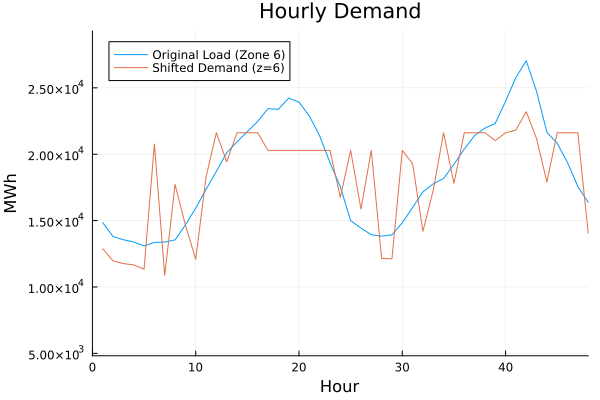

In [301]:

#=
# Line plot
plot(df_time_series.h, df_time_series.total_d_shift, 
     xlabel="Time (Hours)", ylabel="Total Shifted Demand (MW)",
     title="EV Demand Shift Over Time", lw=2, legend=false)
=#





# Aggregate total demand shifts per hour
df_time_series = combine(groupby(df_d, :h), :d_value => sum => :total_d_shift)

# Filter data for zone z=2
df_d_z6 = filter(row -> row.z == 6, df_d)
df_d_z6 = combine(groupby(df_d_z6, :k), :d_value => sum => :d_value)

#println(df_grouped_by_k6)  # Show grouped data


# Plot original load
plot(load.Load_MW_z6, xlims=(0,48), label="Original Load (Zone 6)")

# Plot shifted load
plot!(df_d_z6.k,load.Load_MW_z6-flex_avail.ev_load_shifting_z6+df_d_z6.d_value, xlims=(0,48), label="Shifted Demand (z=6)")

# Labels and Title
title!("Hourly Demand")
xlabel!("Hour")
ylabel!("MWh")
#println(first(df_d_z6, 10))  # Show first 10 rows
#print((last(df_d_z6)))



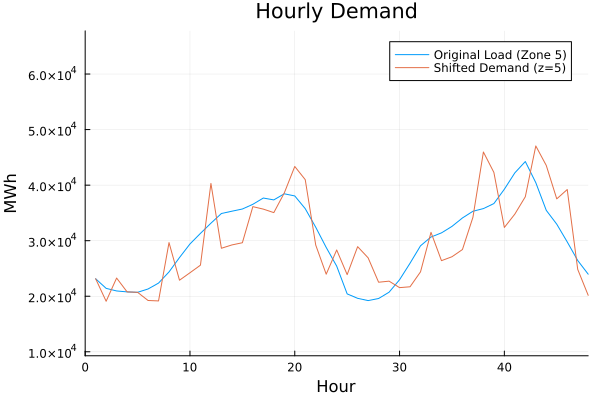

In [302]:
# Aggregate total demand shifts per hour
df_time_series = combine(groupby(df_d, :h), :d_value => sum => :total_d_shift)

# Filter data for zone z=2
df_d_z5 = filter(row -> row.z == 5, df_d)

df_d_z5 = combine(groupby(df_d_z5, :k), :d_value => sum => :d_value)

#println(df_grouped_by_k5)  # Show grouped data


# Plot original load
plot(load.Load_MW_z5, xlims=(0,48), label="Original Load (Zone 5)")

# Plot shifted load
plot!(df_d_z5.k,load.Load_MW_z5-flex_avail.ev_load_shifting_z5+df_d_z5.d_value, xlims=(0,48), label="Shifted Demand (z=5)")

# Labels and Title
title!("Hourly Demand")
xlabel!("Hour")
ylabel!("MWh")

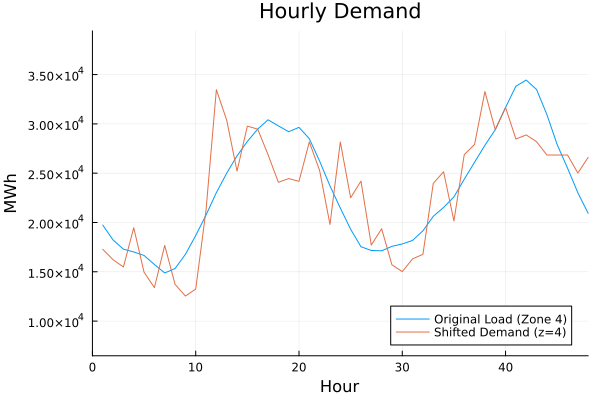

In [303]:
# Aggregate total demand shifts per hour
df_time_series = combine(groupby(df_d, :h), :d_value => sum => :total_d_shift)

# Filter data for zone z=2
df_d_z4 = filter(row -> row.z == 4, df_d)

df_d_z4 = combine(groupby(df_d_z4, :k), :d_value => sum => :d_value)

#println(df_grouped_by_k4)  # Show grouped data

# Plot original load
plot(load.Load_MW_z4, xlims=(0,48), label="Original Load (Zone 4)")

# Plot shifted load
plot!(df_d_z4.k,load.Load_MW_z4-flex_avail.ev_load_shifting_z4+df_d_z4.d_value, xlims=(0,48), label="Shifted Demand (z=4)")

# Labels and Title
title!("Hourly Demand")
xlabel!("Hour")
ylabel!("MWh")

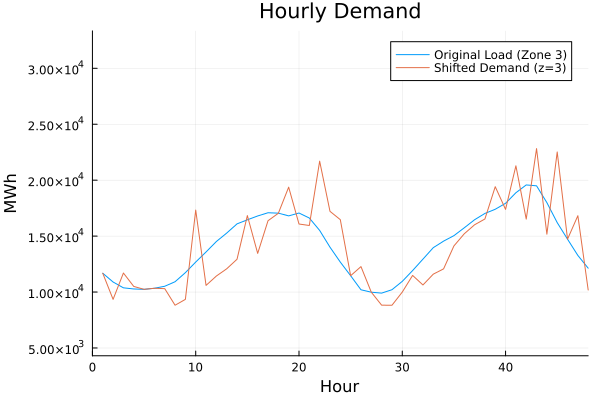

In [304]:
# Aggregate total demand shifts per hour
df_time_series = combine(groupby(df_d, :h), :d_value => sum => :total_d_shift)

# Filter data for zone z=2
df_d_z3 = filter(row -> row.z == 3, df_d)

df_d_z3 = combine(groupby(df_d_z3, :k), :d_value => sum => :d_value)

#println(df_grouped_by_k3)  # Show grouped data


# Plot original load
plot(load.Load_MW_z3, xlims=(0,48), label="Original Load (Zone 3)")

# Plot shifted load
plot!(df_d_z3.k,load.Load_MW_z3-flex_avail.ev_load_shifting_z3+df_d_z3.d_value, xlims=(0,48), label="Shifted Demand (z=3)")

# Labels and Title
title!("Hourly Demand")
xlabel!("Hour")
ylabel!("MWh")

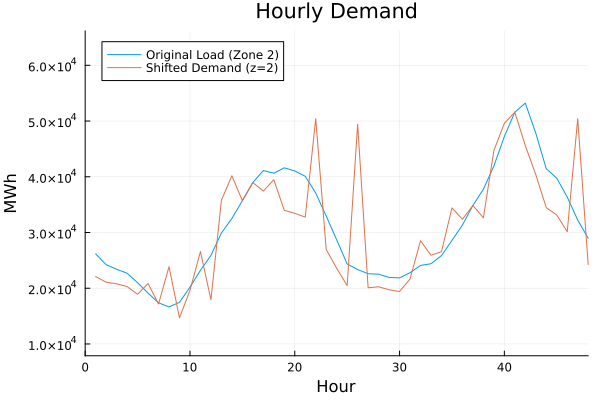

In [305]:
# Aggregate total demand shifts per hour
df_time_series = combine(groupby(df_d, :h), :d_value => sum => :total_d_shift)

# Filter data for zone z=2
df_d_z2 = filter(row -> row.z == 2, df_d)

df_d_z2 = combine(groupby(df_d_z2, :k), :d_value => sum => :d_value)

#println(df_grouped_by_k2)  # Show grouped data

# Plot original load
plot(load.Load_MW_z2, xlims=(0,48), label="Original Load (Zone 2)")

# Plot shifted load
plot!(df_d_z2.k,load.Load_MW_z2-flex_avail.ev_load_shifting_z2+df_d_z2.d_value, xlims=(0,48), label="Shifted Demand (z=2)")

# Labels and Title
title!("Hourly Demand")
xlabel!("Hour")
ylabel!("MWh")

In [306]:
# Aggregate total demand shifts per hour
df_time_series = combine(groupby(df_d, :h), :d_value => sum => :total_d_shift)

# Filter data for zone z=2
df_d_z1 = filter(row -> row.z == 1, df_d)

df_d_z1 = combine(groupby(df_d_z1, :k), :d_value => sum => :d_value)

#println(df_grouped_by_k1)  # Show grouped data


# Plot original load
plot(load.Load_MW_z1, xlims=(0,48), label="Original Load (Zone 1)")

# Plot shifted load
plot!(df_d_z1.k,load.Load_MW_z1-flex_avail.ev_load_shifting_z1+df_d_z1.d_value, xlims=(0,48), label="Shifted Demand (z=1)")

# Labels and Title
title!("Hourly Demand")
xlabel!("Hour")
ylabel!("MWh")
size(df_d)

(314406, 4)

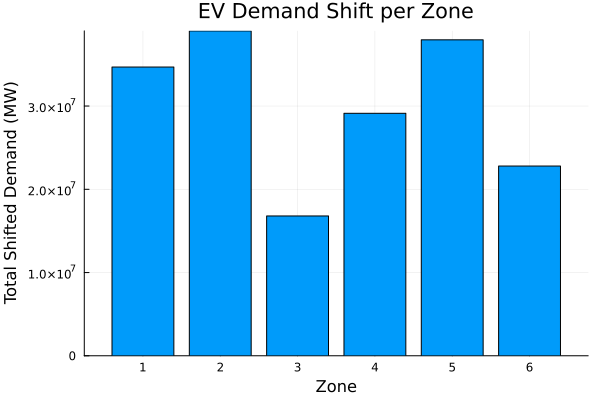

In [307]:
# Aggregate demand shifts per zone
df_zone = combine(groupby(df_d, :z), :d_value => sum => :total_d_shift)

# Bar chart
bar(df_zone.z, df_zone.total_d_shift, 
    xlabel="Zone", ylabel="Total Shifted Demand (MW)",
    title="EV Demand Shift per Zone",
    legend=false)


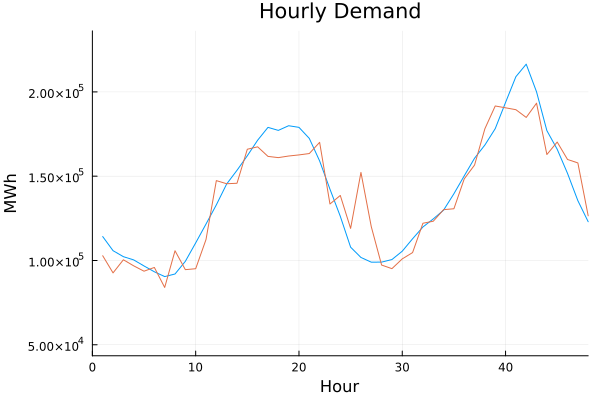

In [308]:
plot(load.Load_MW_z1+load.Load_MW_z2+load.Load_MW_z3+load.Load_MW_z4+load.Load_MW_z5+load.Load_MW_z6, xlims=(0,48) ,label="")
plot!(load.Load_MW_z1+load.Load_MW_z2+load.Load_MW_z3+load.Load_MW_z4+load.Load_MW_z5+load.Load_MW_z6-
flex_avail.ev_load_shifting_z1-flex_avail.ev_load_shifting_z2-flex_avail.ev_load_shifting_z3-flex_avail.ev_load_shifting_z4-flex_avail.ev_load_shifting_z5-flex_avail.ev_load_shifting_z6+
df_d_z1.d_value+df_d_z2.d_value+df_d_z3.d_value+df_d_z4.d_value+df_d_z5.d_value+df_d_z6.d_value, xlims=(0,48) ,label="")
title!("Hourly Demand")
xaxis!("Hour")
yaxis!("MWh")


In [309]:
#=
plot(load.Load_MW_z1+load.Load_MW_z2+load.Load_MW_z3+load.Load_MW_z4+load.Load_MW_z5+load.Load_MW_z6
-flex_avail.ev_load_shifting_z1-flex_avail.ev_load_shifting_z2-flex_avail.ev_load_shifting_z3-flex_avail.ev_load_shifting_z4-flex_avail.ev_load_shifting_z5-flex_avail.ev_load_shifting_z6
+df_d_z1.d_value[:,4]#+df_d_z2.d_value+df_d_z3.d_value+df_d_z4.d_value+df_d_z5.d_value+df_d_z6.d_value
, xlims=(0,48) ,label="")
=#

In [310]:

# Extract capacity values for each generator
gen_capacities = [(g, value(CAP[g])) for g in Id_gen]

# Convert to a DataFrame for better visualization
df_gen_capacities = DataFrame(generator=first.(gen_capacities), capacity=last.(gen_capacities))

# Print the capacity values
println(df_gen_capacities)


12×2 DataFrame
 Row │ generator  capacity  
     │ Int64      Float64   
─────┼──────────────────────
   1 │        48  33058.4
   2 │        65  57099.1
   3 │        79  45091.3
   4 │       117  30819.6
   5 │       120  83997.0
   6 │       143  20950.6
   7 │       156    350.831
   8 │       157  31494.0
   9 │       158   9728.01
  10 │       159   4586.58
  11 │       160  27850.7
  12 │       161   2309.79


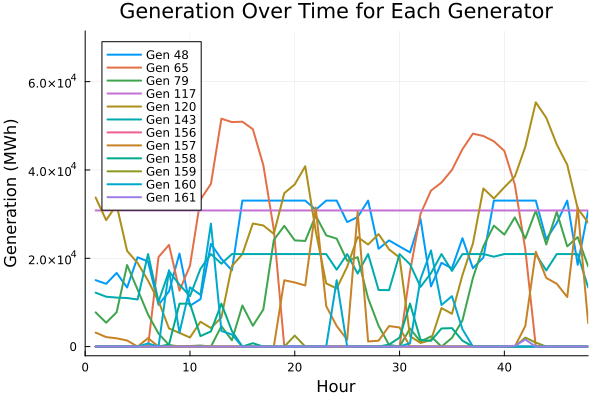

In [311]:
# Extract generation values for each generator and hour
########################################################

# Create empty arrays to store generator, hour, and generation values
generators = Int[]
hours = Int[]
generation_values = Float64[]

# Loop through each generator and hour, and store values
for g in Id_gen
    for h in H
        push!(generators, g)
        push!(hours, h)
        push!(generation_values, value(GEN[g, h]))
    end
end

# Create DataFrame from the collected values
df_gen_values = DataFrame(generator=generators, hour=hours, generation=generation_values)

# Print first 10 rows to verify
#println(first(df_gen_values, 10))

#######################################################

#PLOT OF GENERATION
using Plots
# Create a plot
plot(xlims=(0,48))

# Loop through each generator and plot its generation over time
for g in unique(df_gen_values.generator)
    gen_data = df_gen_values[df_gen_values.generator .== g, :]
    plot!(gen_data.hour, gen_data.generation, label="Gen $g", linewidth=2)
end

# Labels and title
xlabel!("Hour")
ylabel!("Generation (MWh)")
title!("Generation Over Time for Each Generator")
#legend(:topright)  # Adjust legend position





In [312]:
# Extract storage capacities
stor_capacities = [(s, value(CAP_stor[s])) for s in Id_storage]

# Convert to a DataFrame
df_stor_capacities = DataFrame(storage_unit=first.(stor_capacities), 
                               capacity=last.(stor_capacities))

# Print the storage capacities
println(df_stor_capacities)

1×2 DataFrame
 Row │ storage_unit  capacity 
     │ Int64         Float64  
─────┼────────────────────────
   1 │           58     100.0


In [313]:
print(gen)

12×41 DataFrame
 Row │ R_ID   Zone_name  Zone   Resource           Cluster     New_Build  Num_Units  Cap_size  Existing_Cap_MW  Existing_Cap_MWh  capex      Inv_cost_per_MWyr  capex_mwh  Inv_cost_per_MWhyr  Fixed_OM_cost_per_MWyr  Fixed_OM_cost_per_MWhyr  Var_OM_cost_per_MWh  Fuel                       Heat_rate_MMBTU_per_MWh  heat_rate_mmbtu_mwh_iqr  heat_rate_mmbtu_mwh_std  Min_power  Ramp_Up_percentage  Ramp_Dn_percentage  Commit  Start_cost_per_MW  Start_fuel_MMBTU_per_MW  Up_time  Down_time  Charge_efficiency  Discharge_efficiency  Min_Duration  Max_Duration  THERM  VRE    MUSTRUN  STOR   HYDRO  RPS    CES    Cost_per_MMBtu 
     │ Int64  String15   Int64  String31           String15    Int64      Int64      Int64     Int64            Int64             Float64    Float64            Float64    Int64               Int64                   Int64                    Float64              String31                   Float64                  Int64                    Int64                   